# Getting home in time for tea- What are the greatest indicators of heavy traffic on the I-94 highway?

One of the most crucial components of good transport infrastructure is that citizens using the roads manage to complete their journey in a timely and effective manner. This is most important for time spent commuting to work, but it is also critical for emergency services responding totime-pressured situations. However, as driving is a part of every day life for a number of reasons, reducing congestion has many benefits.

In this project I shall be looking at a number of factors that potentially contribute to congestion on the I-94 highway. The two groups of factors I shall be investigating our time and weather related factors. Once analysis is complete, I will suggest a course of action to make journey time more efficient.

## Part 1: reading in libraries and exploring the data

In [20]:
#Libraries
import matplotlib.pyplot as plt
import pandas as pd

#Magic function to render in figures
%matplotlib inline

#Reading in and exploring the null values in the dataset
traffic= pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
print("first 10 rows: \n", traffic.head(10), "\n")
print("last 10 rows: \n", traffic.tail(10), "\n")
print("Dataframe info: \n", traffic.info())

first 10 rows: 
   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   
5     NaN  291.72      0.0      0.0           1        Clear   
6     NaN  293.17      0.0      0.0           1        Clear   
7     NaN  293.86      0.0      0.0           1        Clear   
8     NaN  294.14      0.0      0.0          20       Clouds   
9     NaN  293.10      0.0      0.0          20       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 

There are no null values in the relevant columns we're investigating.

## Part 2: Analysis and visualisation of the traffic volume data based on date and time

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


Text(0.5, 0, 'Traffic volume per hour')

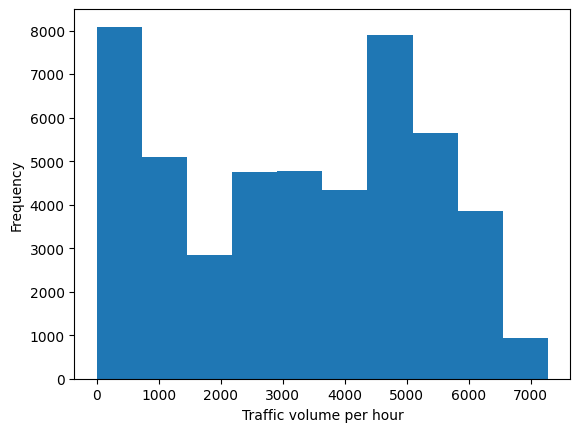

In [21]:
#further analysis of the traffic volume column
print(traffic["traffic_volume"].describe())

#plotting traffic volume to get an idea for potential congestion
traffic["traffic_volume"].plot.hist()
plt.xlabel("Traffic volume per hour")

Looking at the above histogram, you can almost see two skewed datasets. I think that the majority from 0 to 4000 may represent off peak night hours, and the 4000 and above frequency may represent peak time and off peak during the day. Let us investigate this further.

In [22]:
#Transforming the date_time column to datetime type
traffic["date_time"]=pd.to_datetime(traffic["date_time"])
traffic_time = traffic["date_time"].dt.hour


#Daytime boolean series
daytime_mask = (traffic.date_time.dt.hour >= 7) & (traffic.date_time.dt.hour < 19)
daytime_traffic = traffic[daytime_mask]

#nighttime boolean series
nighttime_mask = (traffic.date_time.dt.hour < 7) | (traffic.date_time.dt.hour >= 19)
nighttime_traffic = traffic[nighttime_mask]

(0.0, 8000.0)

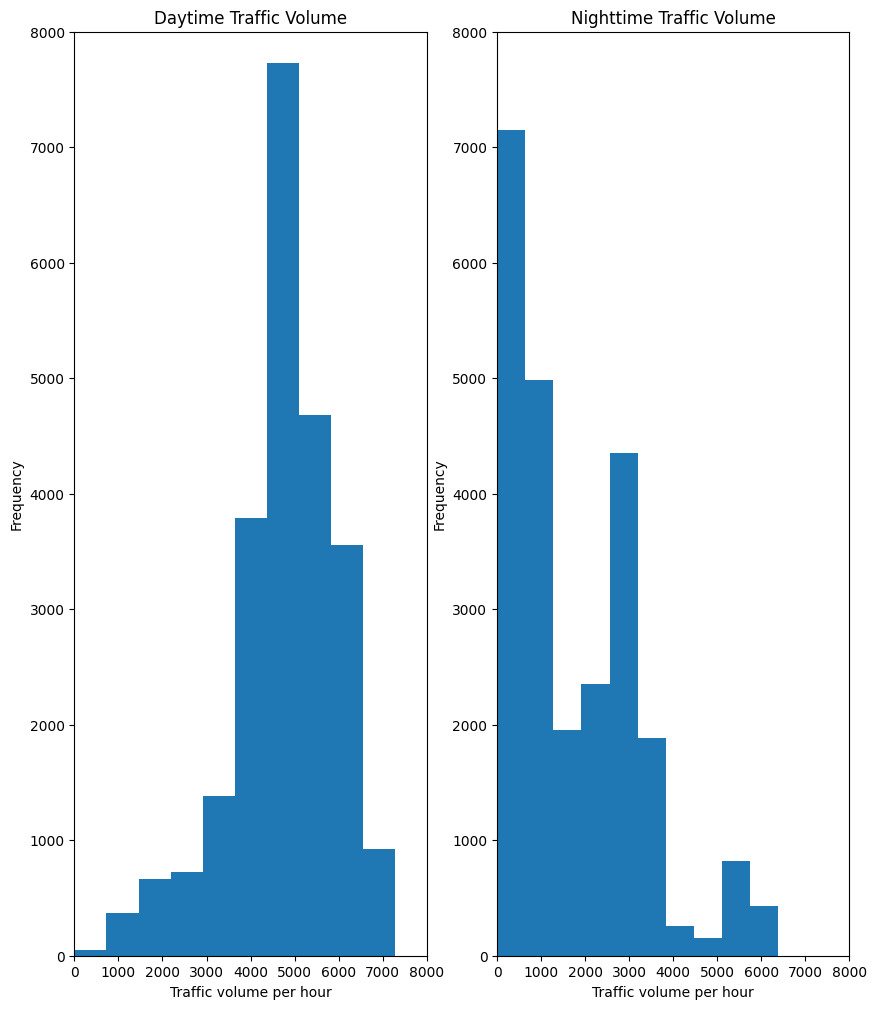

In [23]:
#Daytime traffic volume barplot
plt.figure(figsize = (10,12))
plt.subplot(1,2,1)
daytime_traffic["traffic_volume"].plot.hist()
plt.title("Daytime Traffic Volume")
plt.xlabel("Traffic volume per hour")
plt.ylabel("Frequency")
plt.ylim(0,8000)
plt.xlim(0,8000)

#nighttime traffic volume barplot
plt.subplot(1,2,2)
nighttime_traffic["traffic_volume"].plot.hist()
plt.title("Nighttime Traffic Volume")
plt.xlabel("Traffic volume per hour")
plt.ylabel("Frequency")
plt.ylim(0,8000)
plt.xlim(0,8000)

From the bar plots shown above, visually we can see that high traffic volumes happen much more frequently during the day then the night. let's compute some statistics to make our observation more objective.


In [24]:
#daytime statistics 
print("daytime statistics: \n", daytime_traffic["traffic_volume"].describe(), "\n")

#nighttime statistics
print("nighttime statistics: \n", nighttime_traffic["traffic_volume"].describe())


daytime statistics: 
 count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64 

nighttime statistics: 
 count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


The shapes indicate that during the day there is much higher congestion, however, there are some points where at nighttime there is congestion, but there's not enough to warrant investigating. Now that we know to focus our analysis to daytime traffic, let us investigate month to month congestion.

In [25]:
# Isolating the month from the date_time column
daytime_traffic['month'] = daytime_traffic['date_time'].dt.month

#grouping by month and aggregating the data using the mean
by_month = daytime_traffic.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

/tmp/ipykernel_108/2039761874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic['month'] = daytime_traffic['date_time'].dt.month


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

At a glance it's hard to distrinquish any meaningful difference month to month, so let's make a figure to help clarify

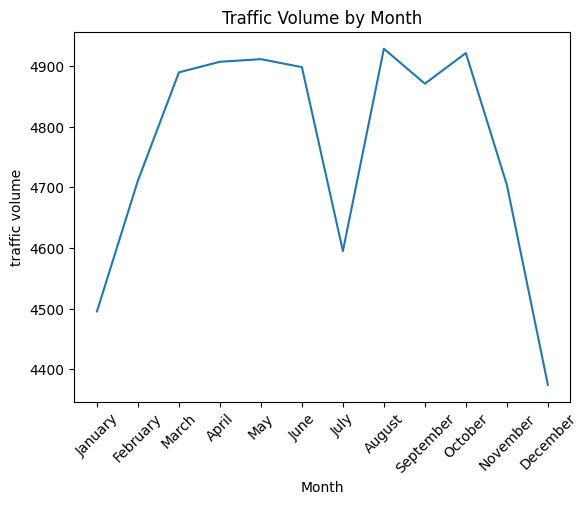

In [26]:
#months variable for graph xticks
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]

#line graph for traffic volume by month
plt.plot(by_month["traffic_volume"])
plt.title("Traffic Volume by Month")
plt.xlabel("Month")
plt.ylabel("traffic volume")
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = months,
          rotation = 45)
plt.show()

In the above graph, we can see that generally in colder months there is less congestion. However, July is an exception to this observation. Let's take a more meaningful look at July to see what may have caused this.

/tmp/ipykernel_108/3954998379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic['year'] = daytime_traffic['date_time'].dt.year


Text(0, 0.5, 'mean traffic volume')

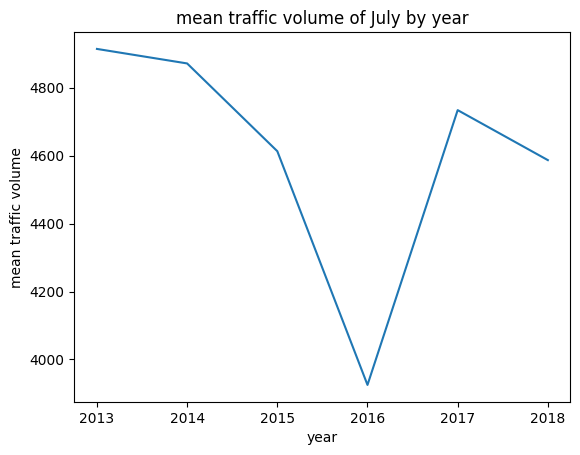

In [56]:
# Isolating the year from the date_time column
daytime_traffic['year'] = daytime_traffic['date_time'].dt.year

#Isolating July and finding traffic volume mean by year
by_july = daytime_traffic[daytime_traffic["month"] == 7]
by_july_mean = by_july.groupby("year").agg("mean", numeric_only = True)

#line graph
by_july_mean["traffic_volume"].plot()
plt.title("mean traffic volume of July by year")
plt.ylabel("mean traffic volume")

In 2016, the mean traffic volume was very minimal. Upon further research it was found that the highway was undergoing maintenance and repairs that month in 2016. Therefore, we can disregard the lower July traffic volume on the previous graph as an anomaly and therefore won't need to investigate it further.

In [57]:
# Isolating the day from the date_time column
daytime_traffic['dayofweek'] = daytime_traffic['date_time'].dt.dayofweek

#grouping by day and aggregating the data using the mean
by_dayofweek = daytime_traffic.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

/tmp/ipykernel_108/1201260916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic['dayofweek'] = daytime_traffic['date_time'].dt.dayofweek


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

It is easier to see a trend with weekdays having higher congestion than weekends, but let us create a figure to better understand the data.

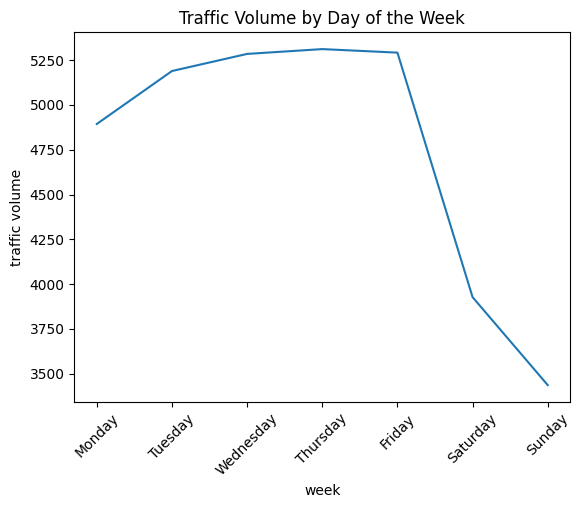

In [58]:
#days variable for graph xticks
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

#line graph for traffic volume by day
plt.plot(by_dayofweek["traffic_volume"])
plt.title("Traffic Volume by Day of the Week")
plt.xlabel("week")
plt.ylabel("traffic volume")
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = days,
          rotation = 45)
plt.show()

From this graph we can see that traffic volume on weekdays is roughly the same, in comparison with weekend where there is a steep drop in traffic volume. This is possibly due to the work commute. Considering jobs are often 9-5, let us look at the traffic volume by hour next.

In [59]:
#Isolating the hour from the date_time column
daytime_traffic['hour'] = daytime_traffic['date_time'].dt.hour

#isolating weekday hours
business_days = daytime_traffic.copy()[daytime_traffic['dayofweek'] <= 4] # 4 == Friday

#isolating weekend hours
weekend = daytime_traffic.copy()[daytime_traffic['dayofweek'] >= 5] # 5 == Saturday

#grouping by hour and aggregating the data using the mean
by_hour_business = business_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

/tmp/ipykernel_108/1330840623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic['hour'] = daytime_traffic['date_time'].dt.hour


(1500.0, 6250.0)

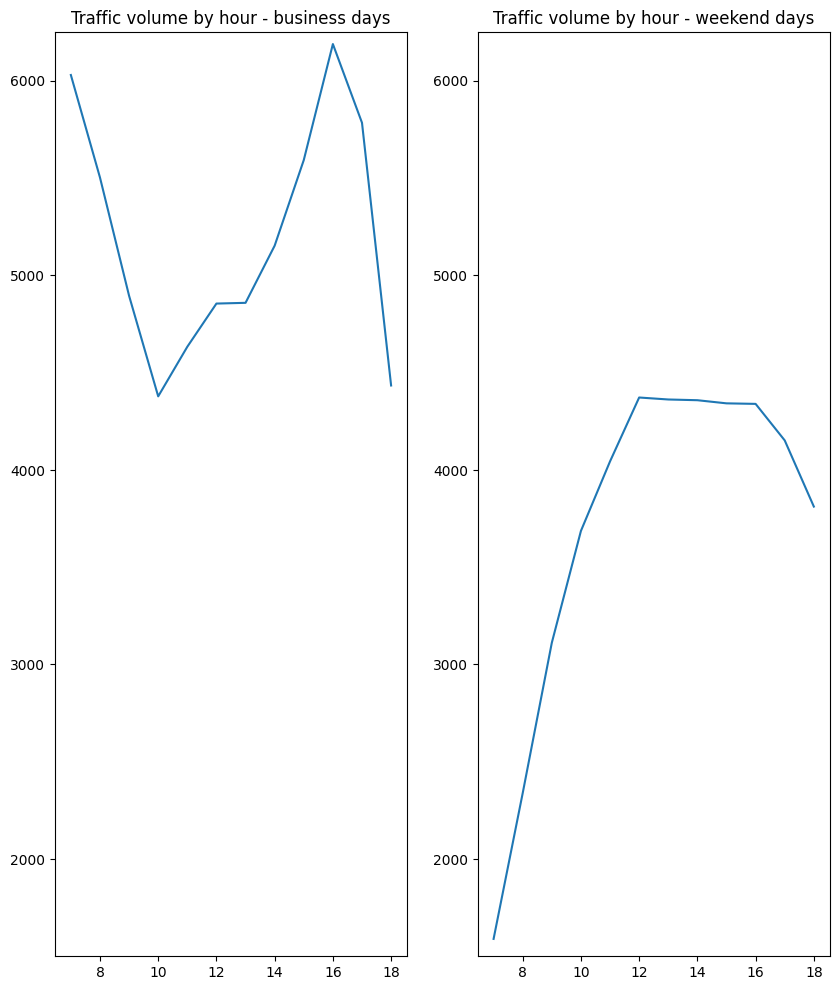

In [60]:

#Line graphs for traffic volume by hour
#week day hours
plt.figure(figsize = (10,12))
plt.subplot(1,2,1)
plt.plot(by_hour_business["traffic_volume"])
plt.title("Traffic volume by hour - business days")
plt.ylim(1500,6250)

#weekend hours
plt.subplot(1,2,2)
plt.plot(by_hour_weekend["traffic_volume"])
plt.title("Traffic volume by hour - weekend days")
plt.ylim(1500,6250)



From these graphs, we can see that on weekdays traffic is highest around 8AM and 4PM, this would confirm that high traffic volumes are around working hours. On weekends a very different story is told, traffic volume only peaks around 12pm, roughly at the same traffic volume at the lowest point during the weekday.

## Part 2: analysis and visualisation of traffic traffic volume based on weather conditions

In part 1, we found that the highest traffic volume was throughout the data. Our further analysis will be focused on this data. Firstly, let us find what weather conditions correlate with a higher traffic volume.

In [61]:
#Isolating weather conditions from daytime data set
num_day = daytime_traffic.iloc[:,[1,2,3,4,8]]

#correlation for different weather conditions and traffic volume
num_day.corr()["traffic_volume"]



temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

From the correlation data we can see that temperature has the highest correlation with traffic volume, with a higher temperature correlating with increased traffic volume. The other factors are less clearly correlated, let us investigate their relationship further with scatter plots.

Text(0, 0.5, 'Traffic volume per hour')

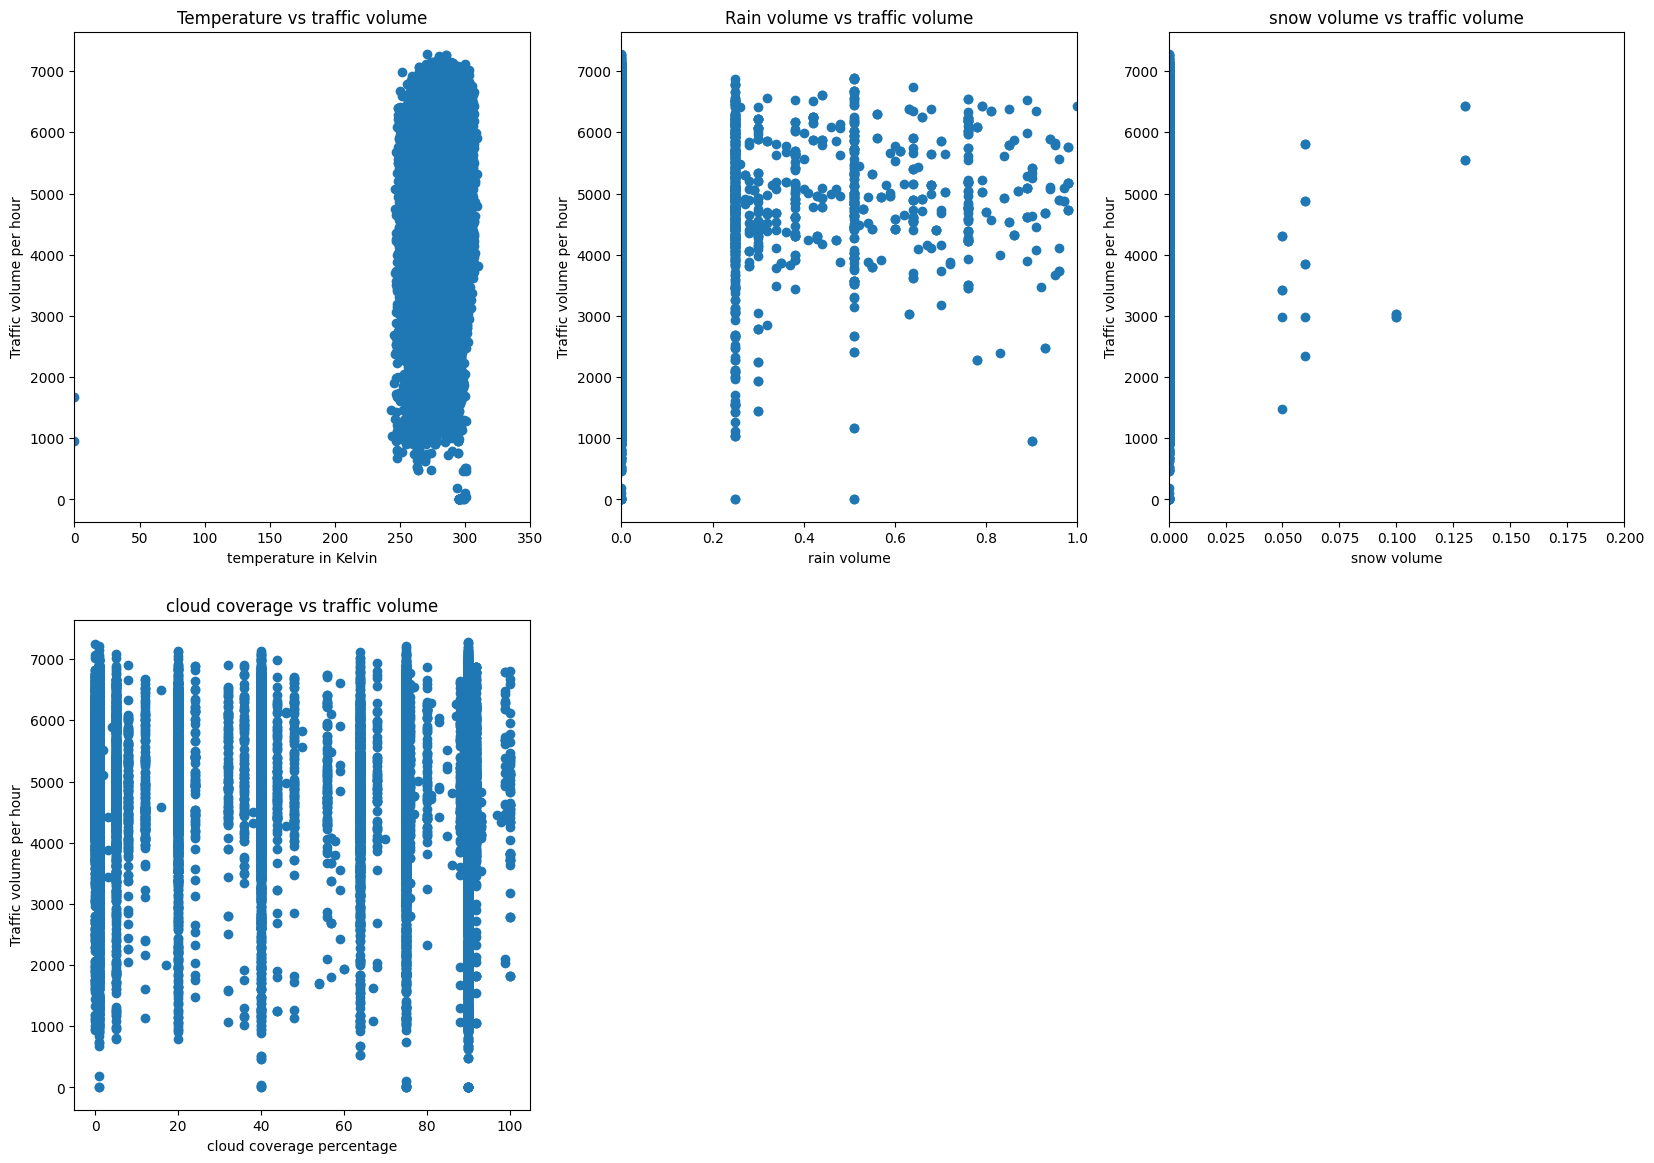

In [72]:
plt.figure(figsize=(20,14))
#Temperature plot
plt.subplot(2,3,1)
plt.title("Temperature vs traffic volume")
plt.scatter(daytime_traffic["temp"],daytime_traffic["traffic_volume"])
plt.xlabel("temperature in Kelvin")
plt.ylabel("Traffic volume per hour")
plt.xlim(0, 350)
#Rain plot
plt.subplot(2,3,2)
plt.title("Rain volume vs traffic volume")
plt.scatter(daytime_traffic["rain_1h"],daytime_traffic["traffic_volume"])
plt.xlabel("rain volume")
plt.ylabel("Traffic volume per hour")
plt.xlim(0,1)
#snow plot
plt.subplot(2,3,3)
plt.title("snow volume vs traffic volume")
plt.scatter(daytime_traffic["snow_1h"],daytime_traffic["traffic_volume"])
plt.xlabel("snow volume")
plt.ylabel("Traffic volume per hour")
plt.xlim(0,0.2)
#cloud coverage plot
plt.subplot(2,3,4)
plt.title("cloud coverage vs traffic volume")
plt.scatter(daytime_traffic["clouds_all"],daytime_traffic["traffic_volume"])
plt.xlabel("cloud coverage percentage")
plt.ylabel("Traffic volume per hour")

From the above graphs we can confidently conclude that none of these factors have a great effect on traffic volume and therefore will not be investigated further. Next, let us take a look at different weather conditions and what effect they may have on traffic volume.

In [63]:
#Grouping data by types of weather, isolating the traffic volume column and aggregating by mean
by_weather_main = daytime_traffic.groupby('weather_main')["traffic_volume"].agg("mean")

#quick cleanup of the weather description column
daytime_traffic["weather_description"] = daytime_traffic["weather_description"].replace('SQUALLS',"squalls")

#Grouping data by weather description, isolating the traffic volume column and aggregating by mean
by_weather_description = daytime_traffic.groupby('weather_description')["traffic_volume"].agg("mean")


/tmp/ipykernel_108/56563920.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic["weather_description"] = daytime_traffic["weather_description"].replace('SQUALLS',"squalls")


Text(0.5, 0, 'Traffic volume')

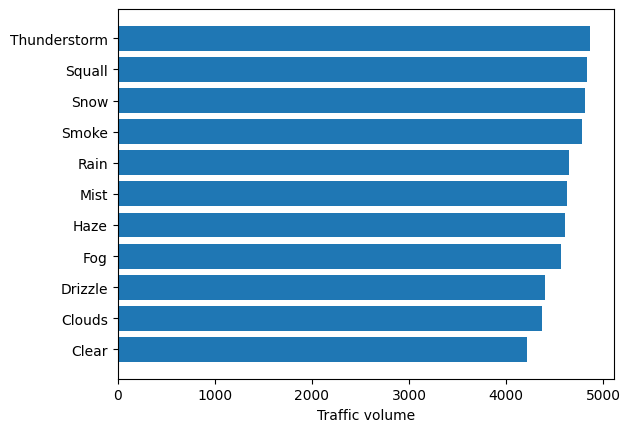

In [73]:
#barplot for weather types
plt.barh(by_weather_main.index,by_weather_main.sort_values(ascending= True))
plt.xlabel("Traffic volume")

From the above graph we can see that there isn't a great amount of variation between different weather types, however stormy weather does have a somewhat noticable affect on traffic volume compared to milder weather types

Text(0.5, 0, 'traffic volume')

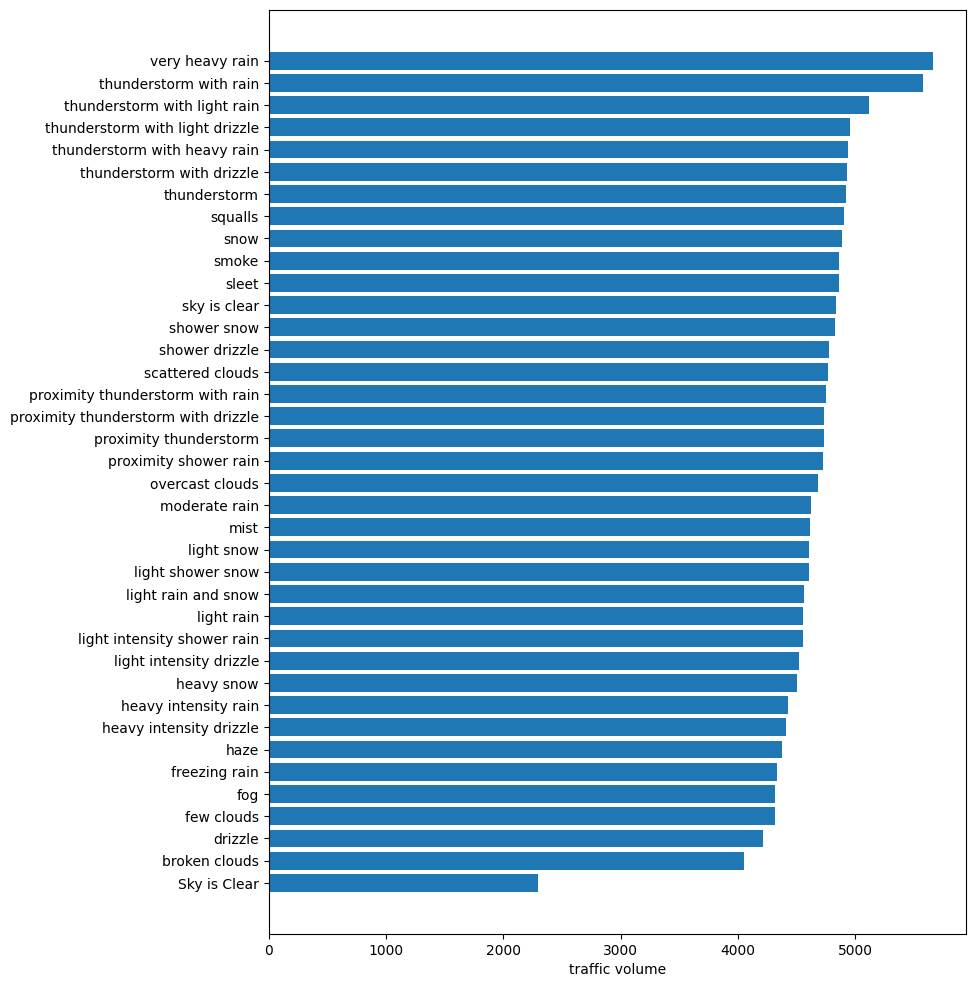

In [74]:
plt.figure(figsize=(9,12))
plt.barh(by_weather_description.index,by_weather_description.sort_values(ascending= True))
plt.xlabel("traffic volume")

Looking at the above graph, we can see that any adverse weather has an effect on traffic volume, however stormy weather with heavy rain has the great affect, correlated with almost triple the traffic volume compared to when there's clear skies.

## Part 4: discussion and conclusion

From our data analysis we have pinpointed when traffic congestion is most likely to occur based on traffic volume. the day and time seem to be the strongest indicators, following the classic 9-5 work schedule. We can also see a trend with colder months having lower traffic volume.

Particular weather conditions were also a strong indicator, with stormy weather significantly increasing traffic volume. However, we can see that any kind of adverse weather has an affect on the traffic volume. This may be due to adverse road conditions in which drivers may choose to be cautious and slow down.

In conclusion, based on this information I would suggest that more money should be invested in public transport systems such as buses to ease congestion during morning and afternoon commutes. I would also suggest that information about driving conditions based on weather is updated hourly on a website that is easy to access so drivers can make an informed decision on driving during adverse weather events, keeping the traffic volume down. With these suggestions, I would hope to improve journey time effiency.